In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import colormaps as cmaps
import matplotlib.colors as mc
import matplotlib.pyplot as plt


In [2]:
# set colormap name
colormap_name = "tofino"
# get color map
cmap = getattr(cmaps, colormap_name)


In [3]:
# loads csv to pandas dataframe
df = pd.read_csv("FreshData.csv", encoding='utf-16', delimiter='\t')

# unifies NaNs: Replace all "NaN" values in df with "nan"
df = df.replace(np.nan, 'nan', regex=True)

# specific for this analysis: replace all "NaN"s in df with "Unknown"
df = df.replace('nan', 'Unknown', regex=True)

# data for each study 
df_study1 = df[df['Study'] == 'Study 1']
df_study2 = df[df['Study'] == 'Study 2']

In [4]:
# collect each teams responses in agreement / disagreement 
hyp1257 = ['Hypothesis 1', 'Hypothesis 2','Hypothesis 5', 'Hypothesis 7']
hyp346 = [ 'Hypothesis 3', 'Hypothesis 4', 'Hypothesis 6']
hypstudy2 = ['Study2 Hypothesis 1 Participant 1',
 'Study2 Hypothesis 1 Participant 2',
 'Study2 Hypothesis 1 Participant 3',
 'Study2 Hypothesis 1 Participant 4',
 'Study2 Hypothesis 1 Participant 5',
 'Study 2 Hypothesis 1 Participant 6',
 'Study 2 Hypothesis 1 Participant 7',
 'Study 2 Hypothesis 1 Participant 8',
 'Study 2 Hypothesis 1 Participant 9',
 'Study 2 Hypothesis 1 Participant 10',
 'Study 2 Hypothesis 2 Participant 1',
 'Study 2 Hypothesis 2 Participant 2',
 'Study 2 Hypothesis 2 Participant 3',
 'Study 2 Hypothesis 2 Participant 4',
 'Study 2 Hypothesis 2 Participant 5',
 'Study 2 Hypothesis 2 Participant 6',
 'Study 2 Hypothesis 2 Participant 7',
 'Study 2 Hypothesis 2 Participant 8',
 'Study 2 Hypothesis 2 Participant 9',
 'Study 2 Hypothesis 2 Participant 10',
 'Study 2 Hypothesis 3 Participant 1',
 'Study 2 Hypothesis 3 Participant 2',
 'Study 2 Hypothesis 3 Participant 3',
 'Study 2 Hypothesis 3 Participant 4',
 'Study 2 Hypothesis 3 Participant 5',
 'Study 2 Hypothesis 3 Participant 6',
 'Study 2 Hypothesis 3 Participant 7',
 'Study 2 Hypothesis 3 Participant 8',
 'Study 2 Hypothesis 3 Participant 9',
 'Study 2 Hypothesis 3 Participant 10',
 'Study 2 Hypothesis 4 Participant 1',
 'Study 2 Hypothesis 4 Participant 2',
 'Study 2 Hypothesis 4 Participant 3',
 'Study 2 Hypothesis 4 Participant 4',
 'Study 2 Hypothesis 4 Participant 5',
 'Study 2 Hypothesis 4 Participant 6',
 'Study 2 Hypothesis 4 Participant 7',
 'Study 2 Hypothesis 4 Participant 8',
 'Study 2 Hypothesis 4 Participant 9',
 'Study 2 Hypothesis 4 Participant 10']

# choose responses 
df_res1257 = df_study1[hyp1257]
df_res346 = df_study1[hyp346]
df_resstudy2 = df_study2[hypstudy2]

# study 2 all hypotheses are expected true
df_resstudy2 = df_resstudy2.replace('Yes', 'In Agreement', regex=True) 
df_resstudy2 = df_resstudy2.replace('No', 'In Disagreement', regex=True) 

# study 1 all hypotheses are expected true, except hypothesis 7 is expected False 
expectedtrue = ['Hypothesis 1', 'Hypothesis 2','Hypothesis 5']
for hyp in expectedtrue : 
    df_res1257[hyp] =  df_res1257[hyp].replace('Yes', 'In Agreement', regex=True) 
    df_res1257[hyp] =  df_res1257[hyp].replace('No', 'In Disagreement', regex=True) 
    
df_res1257['Hypothesis 7'] =  df_res1257['Hypothesis 7'].replace('No', 'In Agreement', regex=True) 
df_res1257['Hypothesis 7'] =  df_res1257['Hypothesis 7'].replace('Yes', 'In Disagreement', regex=True)

df_res346 = df_res346.replace('Yes', 'In Agreement', regex=True) 
df_res346 = df_res346.replace('No', 'In Disagreement', regex=True) 


/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/2122127994.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/2122127994.py:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/2122127994.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [5]:
# prepare data for radar plot 1 

# selection of columns to keep for plot 1 
columns_sig = ['Study', 'Quality/Pruning: Method','Motion Artifact Method','Filtering' ]
df_siganalysis = df[columns_sig]

# rename entries in columns indicated in column_none that contain an "Unknown" to the corresponding entry in none_txt
column_none = ['Quality/Pruning: Method', 'Motion Artifact Method']
none_txt = ['No Pruning', 'No Artifact Removal']
for i in range(len(column_none)):
    df_siganalysis[column_none[i]] = df_siganalysis[column_none[i]].replace('Unknown', none_txt[i], regex=True)

# Pruning
# rename "Other" entries in column 'Quality/Pruning: Method' to 'Other Pruning Method'
df_siganalysis['Quality/Pruning: Method'] = df_siganalysis['Quality/Pruning: Method'].replace('Other', 'Other Pruning Method', regex=True)
# In "Quality/Pruning: Method" rename "Manual Selection" and "Visual Inspection of Time Domain" to 'Manual Pruning
df_siganalysis['Quality/Pruning: Method'] = df_siganalysis['Quality/Pruning: Method'].replace('Visual Inspection of Time Domain', 'Manual Selection', regex=True)
df_siganalysis['Quality/Pruning: Method'] = df_siganalysis['Quality/Pruning: Method'].replace('Manual Selection', 'Manual Pruning', regex=True)
# identify rows with combined metrics
for i in range(len(df_siganalysis['Quality/Pruning: Method'].values)):
    if ',' in df_siganalysis['Quality/Pruning: Method'][i]: 
        df_siganalysis['Quality/Pruning: Method'][i] = 'Combined\nMetrics'
for i in range(len(df_siganalysis['Quality/Pruning: Method'].values)):
    if 'SCI (Scalp-Coupling Index)' in df_siganalysis['Quality/Pruning: Method'][i]: 
        df_siganalysis['Quality/Pruning: Method'][i] = 'Single Metric'
df_siganalysis['Quality/Pruning: Method'] = df_siganalysis['Quality/Pruning: Method'].replace('SNR Threshold', 'Single Metric', regex=True)   
df_siganalysis['Quality/Pruning: Method'] = df_siganalysis['Quality/Pruning: Method'].replace('Other Pruning Method', 'Single Metric', regex=True)    

# Motion Artefacts 
# rename 'No Artifact Removal' entries in column 'Motion Artifact Method' to 'Rejection' to later group in 'Trial Rejection/No Removal'
df_siganalysis['Motion Artifact Method'] = df_siganalysis['Motion Artifact Method'].replace('No Artifact Removal', 'Rejection', regex=True)
# rename "Rejection" entries in column 'Motion Artifact Method' to 'Trial Rejection/No Removal'
df_siganalysis['Motion Artifact Method'] = df_siganalysis['Motion Artifact Method'].replace('Rejection', 'Trial Rejection/\nNo Removal', regex=True)
# identify rows with combined metrics
for i in range(len(df_siganalysis['Motion Artifact Method'].values)):
    if ',' in df_siganalysis['Motion Artifact Method'][i]: 
        df_siganalysis['Motion Artifact Method'][i] = 'Combined Methods'
# identify rows with single method 
single_method =  {'Hybrid spline wavelet', 'Targeted PCA', 'Spline SG', 'Wavelet Filter',  'CBSI', 'Other Removal Method',  'TDDR', 'Other'}
for i in range(len(df_siganalysis['Motion Artifact Method'].values)):
    if  df_siganalysis['Motion Artifact Method'][i] in single_method:
        df_siganalysis['Motion Artifact Method'][i] = 'Single Method'   

# Filtering
# rename "HighPass,LowPass" and "LowPass,HighPass" entries in "Filtering" to "BandPass"
df_siganalysis['Filtering'] = df_siganalysis['Filtering'].replace('HighPass,LowPass', 'BandPass', regex=True)
df_siganalysis['Filtering'] = df_siganalysis['Filtering'].replace('LowPass,HighPass', 'BandPass', regex=True)
df_siganalysis['Filtering'] = df_siganalysis['Filtering'].replace('Unknown', 'No Filter', regex=True)

# choose data for study 1 and 2 
radar1_study1 = df_siganalysis[df_siganalysis['Study'] == 'Study 1']
radar1_study2 = df_siganalysis[df_siganalysis['Study'] == 'Study 2']

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/3493625713.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/3493625713.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/3493625713.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [6]:
# compute for each category percentage of in agreement / disagreement

# store data in these csv 
header = ['Options', 'In Agreement', 'In Disagreement']
data = [['Single Metric', 0, 0], ['Manual Pruning', 0, 0], ['No Pruning', 0, 0], ['Combined\nMetrics', 0, 0], ['Combined Methods', 0, 0], ['Single Method', 0, 0], ['Trial Rejection/\nNo Removal', 0, 0], ['No Filter', 0, 0], ['HighPass', 0, 0], ['BandPass', 0, 0], ['LowPass', 0, 0]]
study2pre = pd.DataFrame(data, columns=header)
study1h346pre = pd.DataFrame(data, columns=header)
study1h1257pre = pd.DataFrame(data, columns=header)

for col in ['Quality/Pruning: Method','Motion Artifact Method','Filtering' ]: 
    # column for study 1 
    column1 = radar1_study1[col]
    column1 = column1[ column1 != 'Not investigated']
    col_counts1 =  pd.Series(column1).value_counts(normalize= True)
    
     # column for study 2 
    column2 = radar1_study2[col]
    column2 = column2[ column2 != 'Not investigated']
    col_counts2 =  pd.Series(column2).value_counts(normalize= True)

    allmethods = set(column1)
    for method in allmethods: 
        scale1 = col_counts1[method]
        index1 = np.array([radar1_study1[col] == method])[0]
        answers1257 = np.array(df_res1257.iloc[index1])
        yes_1257 = np.sum(answers1257 == 'In Agreement')
        no_1257 = np.sum(answers1257 == 'In Disagreement')
        study1h1257pre.loc[study1h1257pre['Options'] == method, 'In Agreement'] = (yes_1257/(yes_1257+ no_1257)) * scale1 
        study1h1257pre.loc[study1h1257pre['Options'] == method, 'In Disagreement'] = (no_1257/(yes_1257+ no_1257)) * scale1 
        answers346 = np.array(df_res346.iloc[index1])
        yes_346 = np.sum(answers346 == 'In Agreement')
        no_346 = np.sum(answers346 == 'In Disagreement')
        study1h346pre.loc[study1h346pre['Options'] == method, 'In Agreement'] = (yes_346/(yes_346+ no_346)) * scale1 
        study1h346pre.loc[study1h346pre['Options'] == method, 'In Disagreement'] = (no_346/(yes_346+ no_346)) * scale1 
        
    allmethods = set(column2)
    for method in allmethods:
        scale2 = col_counts2[method]
        index2 = np.array([radar1_study2[col] == method])[0]
        answersstudy2 = np.array(df_resstudy2.iloc[index2])
        yes_study2 = np.sum(answersstudy2 == 'In Agreement')
        no_study2 = np.sum(answersstudy2 == 'In Disagreement')
        study2pre.loc[study2pre['Options'] == method, 'In Agreement'] = (yes_study2/(yes_study2+ no_study2)) * scale2 
        study2pre.loc[study2pre['Options'] == method, 'In Disagreement'] = (no_study2/(yes_study2+ no_study2))  * scale2 

In [7]:
# prepare data for radar plot 2 

# selection of columns to keep for plot 2 
columns_sig = ['Study',  'Non-GLM: Method', 'GLM: Method', 'GLM: HRF Regressor', 'GLM: Other Regressors']
radar2 = df[columns_sig]
for i in range(len(radar2['GLM: Other Regressors'].values)):
    if ',' in radar2['GLM: Other Regressors'][i]: 
        radar2['GLM: Other Regressors'][i] = 'Multiple Regressors'

radar2['GLM: Other Regressors'] = radar2['GLM: Other Regressors'].replace('Unknown', 'Unknown Regressor', regex=True)
radar2['GLM: Method'] = radar2['GLM: Method'].replace('OLS   ', 'OLS', regex=True)
radar2['GLM: HRF Regressor'] = radar2['GLM: HRF Regressor'].replace('Consecutive Gaussian', 'Consecutive\nGaussian', regex=True)
rows = [['Block Averaging'], ['AR-IRLS', 'OLS'], ['Consecutive\nGaussian', 'FIR', 'Canonical', 'SPM', 'Glover','Gamma' ], 
        ['Multiple Regressors', 'Short Channels', 'PCA of the Short Channels', 'Unknown Regressor']]

radar2_study1= radar2[radar2['Study'] == 'Study 1']
radar2_study2= radar2[radar2['Study'] == 'Study 2']

# store data in these csv 
header = ['Options', 'In Agreement', 'In Disagreement']
data = [[ opt, 0, 0] for i in range(len(rows)) for opt in rows[i] ]
study2hrf =  pd.DataFrame(data, columns=header)
study1h346hrf = pd.DataFrame(data, columns=header)
study1h1257hrf = pd.DataFrame(data, columns=header)


# compute ratios for radar plot 2 
for col in columns_sig[1:]: 
    
    column1 = radar2_study1[col]
    column1 = column1[ column1 != 'Not investigated']
    col_counts1 =  pd.Series(column1).value_counts(normalize= True)
    print(col_counts1)
    
    column2 = radar2_study2[col]
    column2 = column2[ column2 != 'Not investigated']
    col_counts2 =  pd.Series(column2).value_counts(normalize= True)
    print(col_counts2)
    
    allmethods = set(column1)
    for method in allmethods: 
        scale1 = col_counts1[method]
        index1 = np.array([radar2_study1[col] == method])[0]
        answers1257 = np.array(df_res1257.iloc[index1])
        yes_1257 = np.sum(answers1257 == 'In Agreement')
        no_1257 = np.sum(answers1257 == 'In Disagreement')
        study1h1257hrf.loc[study1h1257hrf['Options'] == method, 'In Agreement'] = (yes_1257/(yes_1257+ no_1257)) * scale1 
        study1h1257hrf.loc[study1h1257hrf['Options'] == method, 'In Disagreement'] = (no_1257/(yes_1257+ no_1257)) * scale1 
        answers346 = np.array(df_res346.iloc[index1])
        yes_346 = np.sum(answers346 == 'In Agreement')
        no_346 = np.sum(answers346 == 'In Disagreement')
        study1h346hrf.loc[study1h346hrf['Options'] == method, 'In Agreement'] = (yes_346/(yes_346+ no_346)) * scale1 
        study1h346hrf.loc[study1h346hrf['Options'] == method, 'In Disagreement'] = (no_346/(yes_346+ no_346)) * scale1 
        
    allmethods = set(column2)
    for method in allmethods:
        scale2 = col_counts2[method]
        index2 = np.array([radar2_study2[col] == method])[0]
        answersstudy2 = np.array(df_resstudy2.iloc[index2])
        yes_study2 = np.sum(answersstudy2 == 'In Agreement')
        no_study2 = np.sum(answersstudy2 == 'In Disagreement')
        study2hrf.loc[study2hrf['Options'] == method, 'In Agreement'] = (yes_study2/(yes_study2+ no_study2)) * scale2 
        study2hrf.loc[study2hrf['Options'] == method, 'In Disagreement'] = (no_study2/(yes_study2+ no_study2))  * scale2 


GLM                0.833333
Block Averaging    0.166667
Name: Non-GLM: Method, dtype: float64
GLM                0.735294
Block Averaging    0.235294
Other              0.029412
Name: Non-GLM: Method, dtype: float64
AR-IRLS    0.472222
OLS        0.361111
Unknown    0.166667
Name: GLM: Method, dtype: float64
AR-IRLS    0.441176
OLS        0.294118
Unknown    0.264706
Name: GLM: Method, dtype: float64
Consecutive\nGaussian    0.222222
Canonical                0.222222
Unknown                  0.166667
SPM                      0.138889
Gamma                    0.138889
Glover                   0.083333
FIR                      0.027778
Name: GLM: HRF Regressor, dtype: float64
Unknown                  0.305556
Consecutive\nGaussian    0.194444
Gamma                    0.166667
Canonical                0.111111
SPM                      0.083333
Glover                   0.083333
FIR                      0.055556
Name: GLM: HRF Regressor, dtype: float64
Short Channels               0.472222


/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/3643476310.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/3643476310.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/3643476310.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [8]:
# prepare data for radar plot 3 
columns_sig = [ 'Study', 'Stat Analysis: On Signal Type', 'Stat Analysis: Signal Space','Stat Analysis: Metric']
radar3 = df[columns_sig]

# signal type 
for i in range(len(radar3[ 'Stat Analysis: On Signal Type'].values)):
    if ',' in radar3[ 'Stat Analysis: On Signal Type'][i]: 
        radar3[ 'Stat Analysis: On Signal Type'][i]= 'Other'
#radar3[ 'Stat Analysis: On Signal Type'] = radar3[ 'Stat Analysis: On Signal Type'].replace('Unknown', 'Other', regex=True)
radar3[ 'Stat Analysis: On Signal Type'] = radar3[ 'Stat Analysis: On Signal Type'].replace('Other', 'Other/Multiple\nSignal Types', regex=True)

# signal space 
for i in range(len(radar3['Stat Analysis: Signal Space'].values)):
    if ',' in radar3['Stat Analysis: Signal Space'][i]: 
        radar3['Stat Analysis: Signal Space'][i]= 'Other'      
#radar3['Stat Analysis: Signal Space'] = radar3[ 'Stat Analysis: Signal Space'].replace('Unknown', 'Other', regex=True)
radar3['Stat Analysis: Signal Space'] = radar3[ 'Stat Analysis: Signal Space'].replace('Other', 'Other/Multiple\nSignal Spaces', regex=True)

# metric 
for i in range(len(radar3['Stat Analysis: Metric'])): 
    if radar3['Stat Analysis: Metric'][i] not in {'signal amplitude (windowed)', 'Not investigated', 'beta values provided by GLM'}: 
        radar3['Stat Analysis: Metric'][i] = 'Other Metric'
        
radar3['Stat Analysis: Metric'] = radar3[ 'Stat Analysis: Metric'].replace('beta values provided by GLM', 'GLM Beta Values', regex=True)
radar3['Stat Analysis: Metric'] = radar3[ 'Stat Analysis: Metric'].replace('signal amplitude (windowed)', 'Signal Amp. (windowed)', regex=True)


rows = [[ 'HbO only', 'HbO and HbR', 'Other/Multiple\nSignal Types'], [ 'Channel', 'Other/Multiple\nSignal Spaces', 'ROI'], ['GLM Beta Values', 'Signal Amp. (windowed)', 'Other Metric']]
# store data in these csv 
header = ['Options', 'In Agreement', 'In Disagreement']
data = [[ opt, 0, 0] for i in range(len(rows)) for opt in rows[i] ]
study2stan =  pd.DataFrame(data, columns=header)
study1h346stan = pd.DataFrame(data, columns=header)
study1h1257stan = pd.DataFrame(data, columns=header)

radar3_study1= radar3[radar3['Study'] == 'Study 1']
radar3_study2= radar3[radar3['Study'] == 'Study 2']

# compute ratios for radar plot 3 
for col in columns_sig[1:]: 
    
    column1 = radar3_study1[col]
    column1 = column1[ column1 != 'Not investigated']
    col_counts1 =  pd.Series(column1).value_counts(normalize= True)
    
    column2 = radar3_study2[col]
    column2 = column2[ column2 != 'Not investigated']
    col_counts2 =  pd.Series(column2).value_counts(normalize= True)
    print(col_counts2)
    
    allmethods = set(column1)
    for method in allmethods: 
        scale1 = col_counts1[method]
        index1 = np.array([radar3_study1[col] == method])[0]
        answers1257 = np.array(df_res1257.iloc[index1])
        yes_1257 = np.sum(answers1257 == 'In Agreement')
        no_1257 = np.sum(answers1257 == 'In Disagreement')
        study1h1257stan.loc[study1h1257stan['Options'] == method, 'In Agreement'] = (yes_1257/(yes_1257+ no_1257)) * scale1 
        study1h1257stan.loc[study1h1257stan['Options'] == method, 'In Disagreement'] = (no_1257/(yes_1257+ no_1257)) * scale1 
        answers346 = np.array(df_res346.iloc[index1])
        yes_346 = np.sum(answers346 == 'In Agreement')
        no_346 = np.sum(answers346 == 'In Disagreement')
        study1h346stan.loc[study1h346stan['Options'] == method, 'In Agreement'] = (yes_346/(yes_346+ no_346)) * scale1 
        study1h346stan.loc[study1h346stan['Options'] == method, 'In Disagreement'] = (no_346/(yes_346+ no_346)) * scale1 
        
    allmethods = set(column2)
    for method in allmethods:
        scale2 = col_counts2[method]
        index2 = np.array([radar3_study2[col] == method])[0]
        answersstudy2 = np.array(df_resstudy2.iloc[index2])
        yes_study2 = np.sum(answersstudy2 == 'In Agreement')
        no_study2 = np.sum(answersstudy2 == 'In Disagreement')
        study2stan.loc[study2stan['Options'] == method, 'In Agreement'] = (yes_study2/(yes_study2+ no_study2)) * scale2 
        study2stan.loc[study2stan['Options'] == method, 'In Disagreement'] = (no_study2/(yes_study2+ no_study2))  * scale2 
study2stan

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/1868283503.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/1868283503.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/1868283503.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

HbO only                        0.470588
HbO and HbR                     0.411765
Other/Multiple\nSignal Types    0.088235
Unknown                         0.029412
Name: Stat Analysis: On Signal Type, dtype: float64
ROI                              0.441176
Channel                          0.352941
Other/Multiple\nSignal Spaces    0.176471
Unknown                          0.029412
Name: Stat Analysis: Signal Space, dtype: float64
GLM Beta Values                0.588235
signal amplitude (windowed)    0.294118
Other Metric                   0.117647
Name: Stat Analysis: Metric, dtype: float64


,Options,In Agreement,In Disagreement
0,HbO only,0.242884,0.227704
1,HbO and HbR,0.152803,0.258961
2,Other/Multiple\nSignal Types,0.021324,0.066912
3,Channel,0.214455,0.138486
4,Other/Multiple\nSignal Spaces,0.051595,0.124875
5,ROI,0.145032,0.296144
6,GLM Beta Values,0.279255,0.308980
7,Signal Amp. (windowed),0.000000,0.000000
8,Other Metric,0.072794,0.044853


In [9]:
# prepare data for radar plot 4 
columns_sig = ['Study', 'Stat Analysis: Method', 'Multiple Comparisons Correction', 'Stat Analysis: Threshold (p< X)']
radar4 = df[columns_sig]

# Stat. Method
for i in range(len(radar4[ 'Stat Analysis: Method'].values)):
    if ',' in radar4[ 'Stat Analysis: Method'][i]: 
        radar4[ 'Stat Analysis: Method'][i]= 'Multiple Methods'   
for i in range(len(radar4[ 'Stat Analysis: Method'].values)):
    if radar4[ 'Stat Analysis: Method'][i] in ['One-Sample t-Test', 'Paired t-Test', 'Two-tailed t-test' ]:
        radar4[ 'Stat Analysis: Method'][i]= 'T-Tests'  
    if radar4[ 'Stat Analysis: Method'][i] in ['Robust Mixed Effects Model', 'Bootstrap Estimation', 'Hotelling T2 test', 'Wilcoxon signed-rank test', 'Repeated Measures ANOVA', 'Linear Mixed Effects', 'Fixed Mixed Effects Model', 'Random Effects', 'Mixed Effects Model', 'Permutation Test']:
        radar4[ 'Stat Analysis: Method'][i]= 'Mixed Effects Models'
    if radar4[ 'Stat Analysis: Method'][i] in ['Other', 'Unknown' ]:
        radar4[ 'Stat Analysis: Method'][i]= 'Other/Unknown \nStat. Method'

# Multiple Comparisons Correction
radar4[ 'Multiple Comparisons Correction'] = radar4['Multiple Comparisons Correction'].replace('Benjamini-Hochberg', 'Correction', regex=True)
radar4[ 'Multiple Comparisons Correction'] = radar4['Multiple Comparisons Correction'].replace('Bonferroni', 'Correction', regex=True)
radar4[ 'Multiple Comparisons Correction'] = radar4['Multiple Comparisons Correction'].replace('Benjamini-Yekutieli', 'Correction', regex=True)
radar4[ 'Multiple Comparisons Correction'] = radar4['Multiple Comparisons Correction'].replace('Unknown', 'No Correction', regex=True)


# p-val 
radar4[ 'Stat Analysis: Threshold (p< X)'] = radar4['Stat Analysis: Threshold (p< X)'].replace( '0.05' , 'alpha = 0.05', regex=True)
#radar4[ 'Stat Analysis: Threshold (p< X)'] = radar4['Stat Analysis: Threshold (p< X)'].replace( 'Unknown' , 'Unknown p-', regex=True)
for p in ['0.001', '0.025', '0.01']: 
    radar4[ 'Stat Analysis: Threshold (p< X)'] = radar4['Stat Analysis: Threshold (p< X)'].replace( p , 'alpha < 0.05', regex=True)

# store data in these csv
rows = [[ 'Multiple Methods','Other/Unknown \nStat. Method', 'T-Tests', 'Mixed Effects Models'], [ 'Correction', 'No Correction'], ['alpha < 0.05', 'alpha = 0.05']] 
header = ['Options', 'In Agreement', 'In Disagreement']
data = [[ opt, 0, 0] for i in range(len(rows)) for opt in rows[i] ]
study2test =  pd.DataFrame(data, columns=header)
study1h346test = pd.DataFrame(data, columns=header)
study1h1257test = pd.DataFrame(data, columns=header)

radar4_study1= radar4[radar4['Study'] == 'Study 1']
radar4_study2= radar4[radar4['Study'] == 'Study 2']

# compute ratios for radar plot 4
for col in columns_sig[1:]: 
    
    column1 = radar4_study1[col]
    column1 = column1[ column1 != 'Not investigated']
    col_counts1 =  pd.Series(column1).value_counts(normalize= True)
    
    column2 = radar4_study2[col]
    column2 = column2[ column2 != 'Not investigated']
    col_counts2 =  pd.Series(column2).value_counts(normalize= True)
    print(col_counts1)
    
    allmethods = set(column1)
    for method in allmethods: 
        scale1 = col_counts1[method]
        
        index1 = np.array([radar4_study1[col] == method])[0]
        answers1257 = np.array(df_res1257.iloc[index1])
        yes_1257 = np.sum(answers1257 == 'In Agreement')
        no_1257 = np.sum(answers1257 == 'In Disagreement')
        study1h1257test.loc[study1h1257test['Options'] == method, 'In Agreement'] = (yes_1257/(yes_1257+ no_1257)) * scale1 
        study1h1257test.loc[study1h1257test['Options'] == method, 'In Disagreement'] = (no_1257/(yes_1257+ no_1257)) * scale1 
        
        answers346 = np.array(df_res346.iloc[index1])
        yes_346 = np.sum(answers346 == 'In Agreement')
        no_346 = np.sum(answers346 == 'In Disagreement')
        study1h346test.loc[study1h346test['Options'] == method, 'In Agreement'] = (yes_346/(yes_346+ no_346)) * scale1 
        study1h346test.loc[study1h346test['Options'] == method, 'In Disagreement'] = (no_346/(yes_346+ no_346)) * scale1 
        
    allmethods = set(column2)
    for method in allmethods:
        scale2 = col_counts2[method]
        index2 = np.array([radar4_study2[col] == method])[0]
        answersstudy2 = np.array(df_resstudy2.iloc[index2])
        yes_study2 = np.sum(answersstudy2 == 'In Agreement')
        no_study2 = np.sum(answersstudy2 == 'In Disagreement')
        study2test.loc[study2test['Options'] == method, 'In Agreement'] = (yes_study2/(yes_study2+ no_study2)) * scale2 
        study2test.loc[study2test['Options'] == method, 'In Disagreement'] = (no_study2/(yes_study2+ no_study2))  * scale2 




Mixed Effects Models            0.459459
Multiple Methods                0.378378
T-Tests                         0.108108
Other/Unknown \nStat. Method    0.054054
Name: Stat Analysis: Method, dtype: float64
No Correction    0.611111
Correction       0.388889
Name: Multiple Comparisons Correction, dtype: float64
alpha = 0.05    0.972222
Unknown         0.027778
Name: Stat Analysis: Threshold (p< X), dtype: float64


/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/1925133056.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/1925133056.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipykernel_18873/1925133056.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_r/p9nfbt5x6qq0d9bb35tnkmbm0000gn/T/ipyk

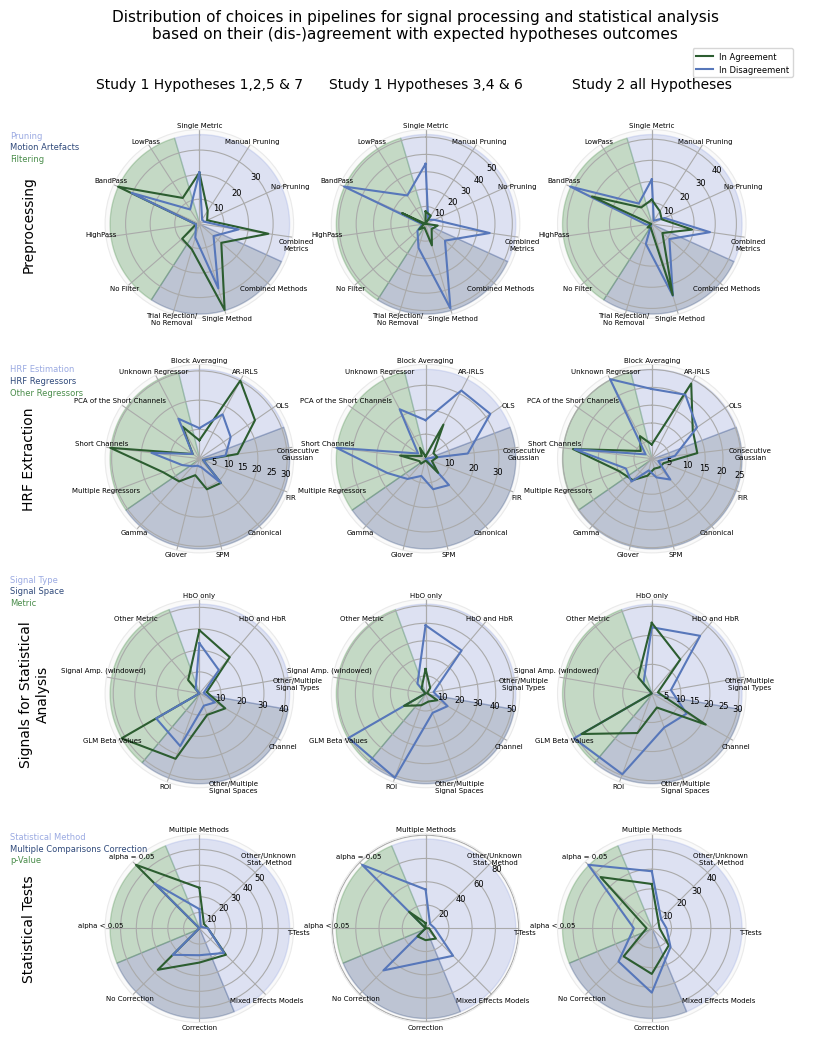

In [10]:
fig, axs = plt.subplots( figsize= (8.27, 11.69), nrows=4, ncols=3, subplot_kw={'projection': 'polar'})

data = [[study1h1257pre, study1h346pre,  study2pre], [study1h1257hrf,  study1h346hrf, study2hrf  ], [study1h1257stan,study1h346stan, study2stan ] , [study1h1257test,study1h346test, study2test ]]

# choose colors 
blue = cmap(0.2)
green  = cmap(0.7)
backgroundcolors = [ cmap(0.1), cmap(0.3), cmap(0.8)]
for i in range(4):
    for j in range(3): 
        ax = axs[i,j]
        # pick data for radar plot 
        D = np.array(data[i][j].values)
    
        methods = list(D[:, 0])
        methods = [*methods, methods[0]]
        n_points = len(methods)
        # compute angles of labels 
        label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods)) 
        
        group_1 = D[:, 1] * 100 
        group_1 = [*group_1, group_1[0]] 
        group_2 = D[:, 2] * 100 
        group_2 = [*group_2, group_2[0]]
        
        # ensure plot with smaller amplitudes is on top 
        if (i,j) in {(0,1), (0,2), (1,1), (2,1), (2,2), (3,1)}:
            ax.plot(label_loc, group_2, color= blue, label='In Disagreement')
            ax.plot(label_loc, group_1, color= green , label='In Agreement')
        
        else: 
            ax.plot(label_loc, group_1, color= green , label='In Agreement')
            ax.plot(label_loc, group_2, color= blue, label='In Disagreement')

        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        max_r = np.maximum(np.max(group_1), np.max(group_2))
        
        # Change the color of the circular gridlines.
        ax.grid(color='#AAAAAA') 
        # Change the color of the outermost gridline
        ax.spines['polar'].set_color('#eaeaea') 
        # Change the background color inside the circle itself
        ax.set_facecolor('#FAFAFA')
        
        
        # Draw axis lines for each angle and label.
        methods[-1] = ''

        label_loc2 = np.degrees(label_loc).copy()

        # adjust labels and color pie parts 
        # add colored labels on the left side 
        if i == 0: 
            label_loc2[2] = label_loc2[2] + 2
            label_loc2[3] = label_loc2[3] + 4
            label_loc2[8] = label_loc2[8] + 2
            label_loc2[9] = label_loc2[9] + 2
            
            halfdeg = label_loc[1]/2 
            begin  = [label_loc[0], label_loc[4] , label_loc[7]]
            end = [ label_loc[3],  label_loc[6], label_loc[10]]
            heading = ['Pruning', 'Motion Artefacts', 'Filtering']
            for k in range(len(begin)): 
                t = np.linspace(begin[k] -halfdeg , end[k] + halfdeg, 100)
                ax.fill_between(t, 0, max_r, color = backgroundcolors[k], alpha = 0.3)
                if j == 0: 
                    fig.text(0.01, 0.87 -0.01* k, heading[k], fontsize=6, color = backgroundcolors[k] )

            
        if i == 1: 
            label_loc2[2] = label_loc2[2] + 2
            label_loc2[3] = label_loc2[3] + 4
            label_loc2[4] = label_loc2[4] + 2
            label_loc2[9] = label_loc2[9] + 2
            label_loc2[10] = label_loc2[10] + 2
            label_loc2[11] = label_loc2[11] + 2

            halfdeg = label_loc[1]/2 
            begin  = [label_loc[0], label_loc[3] , label_loc[9]]
            end = [ label_loc[2],  label_loc[8], label_loc[12]]
            heading = ['HRF Estimation', 'HRF Regressors', 'Other Regressors']
            for k in range(len(begin)): 
                t = np.linspace(begin[k] -halfdeg , end[k] + halfdeg, 100)
                ax.fill_between(t, 0, max_r, color = backgroundcolors[k], alpha = 0.3)
                if j == 0: 
                    fig.text(0.01, 0.67 -0.01* k, heading[k], fontsize=6, color = backgroundcolors[k] )

            
        if i == 2: 
            label_loc2[2] = label_loc2[2] + 4
            label_loc2[3] = label_loc2[3] + 2
            label_loc2[6] = label_loc2[6] + 2
            label_loc2[7] = label_loc2[7] + 4
            
            halfdeg = label_loc[1]/2 
            begin  = [label_loc[0], label_loc[3] , label_loc[6]]
            end = [ label_loc[2],  label_loc[5], label_loc[8]]
            heading = ['Signal Type', 'Signal Space', 'Metric']
            for k in range(len(begin)): 
                t = np.linspace(begin[k] -halfdeg , end[k] + halfdeg, 100)
                ax.fill_between(t, 0, max_r, color = backgroundcolors[k], alpha = 0.3)
                if j == 0: 
                    fig.text(0.01, 0.49 -0.01* k, heading[k], fontsize=6, color = backgroundcolors[k] )
            
        if i == 3: 
            label_loc2[2] = label_loc2[2] + 2
            label_loc2[3] = label_loc2[3] + 2
            label_loc2[6] = label_loc2[6] + 2
            label_loc2[7] = label_loc2[7] + 2
            halfdeg = label_loc[1]/2 
            begin  = [label_loc[0], label_loc[4] , label_loc[6]]
            end = [ label_loc[3],  label_loc[5], label_loc[7]]
            heading = ['Statistical Method', 'Multiple Comparisons Correction', 'p-Value']
            for k in range(len(begin)): 
                t = np.linspace(begin[k] -halfdeg , end[k] + halfdeg, 100)
                ax.fill_between(t, 0, max_r, color = backgroundcolors[k], alpha = 0.3)
                if j == 0: 
                    fig.text(0.01, 0.27 -0.01* k, heading[k], fontsize=6, color = backgroundcolors[k] )
        

        # Set the positions of the labels
        ax.set_thetagrids(np.degrees(label_loc), '')
        label_angles = np.deg2rad(label_loc2)
        label_distances = np.ones_like(label_angles) * (max_r * (1.1)) 
        for angle, distance, method in zip(label_angles, label_distances, methods):
            ax.text(angle, distance, method, fontsize=5, ha='center', va='center')
        for label, angle in zip(ax.get_xticklabels(), label_loc):
            if np.pi/2 < angle: 
                label.set_horizontalalignment('right')
            if 0 < angle < np.pi/2: 
                label.set_horizontalalignment('left')
            else: 
                label.set_horizontalalignment('center')
                
                
        # make y axis label smaller 
        ticks = ax.get_yticks()
        ax.tick_params(axis='y', label1On=False)
        angle = [50, 100, 100, 50 ]
        for k in range(len(ticks)-1): 
            ax.text(np.deg2rad(angle[i]), ticks[k], str(int(ticks[k])),fontsize=6,  ha='center', va='center')

            
# add legend 
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[:2], labels[:2], loc=(0.85,0.925), fontsize = 6)
# set titles 
axs[0,0].set_title('Study 1 Hypotheses 1,2,5 & 7', fontsize=10, pad = 30 )
axs[0,1].set_title('Study 1 Hypotheses 3,4 & 6', fontsize=10, pad = 30 )
axs[0,2].set_title('Study 2 all Hypotheses', fontsize=10, pad =30 )
axs[0,0].set_ylabel('Preprocessing', labelpad = 50 )
axs[1,0].set_ylabel('HRF Extraction', labelpad = 50 )
axs[2,0].set_ylabel('Signals for Statistical\nAnalysis', labelpad = 40 )
axs[3,0].set_ylabel('Statistical Tests', labelpad = 50 )

fig.suptitle('Distribution of choices in pipelines for signal processing and statistical analysis\nbased on their (dis-)agreement with expected hypotheses outcomes', fontsize=11)
plt.savefig('radarchart.pdf', format = 'pdf')

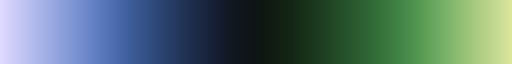

In [11]:
cmap